## Zaimportowanie potrzebnych bibliotek oraz plików z kodem źródłowym

In [1]:
from dataset import Dataset
from utils import split_data, plot_metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from strategies import *
from train import ActiveLearner, FullLearner
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.base import clone
import numpy as np
from utils import evaluate_model

## Konfiguracja hiperparametrów

In [ ]:
CONFIG = {
    "initial_size": 0.005,
    "n_queries": 1000,
    "query_size": 100,
    "test_size": 0.2,
}

## Wczytanie zbioru danych i podział


In [ ]:
dataset = Dataset("covertype")
X, y = dataset.get()

X_init, y_init, X_pool, y_pool, X_test, y_test, X_full, y_full = split_data(X, y, CONFIG["initial_size"], CONFIG["test_size"])

## Przygotownaie modeli oraz strategii

In [4]:
models_map = {
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "svc": SVC(probability=True, kernel='rbf', random_state=42),
    "mlp": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
}

strategies_map = {
    "random": RandomSampling(),
    "least_confidence": LeastConfidence(),
    "margin": MarginSampling(),
    "entropy": EntropySampling(),
}

## Aktywne uczenie się za pomocą klasy ActiveLearner

In [5]:
results_all = []

for model_name, model in models_map.items():

    full_learner = FullLearner(clone(model))
    baseline_metrics = full_learner.train(
        X_full,
        y_full,
        X_test,
        y_test,
    )

    for strategy_name, strategy in strategies_map.items():
        print(f"Training with model: {model_name}, strategy: {strategy_name}")
        active_learner = ActiveLearner(clone(model), strategy)

        results = active_learner.train(
            X_init.copy(), 
            y_init.copy(),
            X_pool.copy(),
            y_pool.copy(),
            X_test,
            y_test,
            CONFIG["n_queries"],
            CONFIG["query_size"]
        )

        results_all.append({
            "model": model_name,
            "strategy": strategy_name,
            "results": results,
            "baseline": baseline_metrics 
        })

Training with model: logistic_regression, strategy: random


 64%|██████▍   | 64/100 [00:01<00:00, 42.88it/s]


Training with model: logistic_regression, strategy: least_confidence


 64%|██████▍   | 64/100 [00:01<00:00, 41.63it/s]


Training with model: logistic_regression, strategy: margin


 64%|██████▍   | 64/100 [00:01<00:00, 42.40it/s]


Training with model: logistic_regression, strategy: entropy


 64%|██████▍   | 64/100 [00:01<00:00, 41.27it/s]


Training with model: random_forest, strategy: random


 64%|██████▍   | 64/100 [00:13<00:07,  4.82it/s]


Training with model: random_forest, strategy: least_confidence


 64%|██████▍   | 64/100 [00:13<00:07,  4.85it/s]


Training with model: random_forest, strategy: margin


 64%|██████▍   | 64/100 [00:12<00:07,  4.93it/s]


Training with model: random_forest, strategy: entropy


 64%|██████▍   | 64/100 [00:12<00:07,  4.93it/s]


Training with model: svc, strategy: random


 64%|██████▍   | 64/100 [00:05<00:03, 10.84it/s]


Training with model: svc, strategy: least_confidence


 64%|██████▍   | 64/100 [00:06<00:03,  9.54it/s]


Training with model: svc, strategy: margin


 64%|██████▍   | 64/100 [00:06<00:03,  9.49it/s]


Training with model: svc, strategy: entropy


 64%|██████▍   | 64/100 [00:06<00:03,  9.51it/s]


Training with model: mlp, strategy: random


 64%|██████▍   | 64/100 [01:05<00:37,  1.03s/it]


Training with model: mlp, strategy: least_confidence


 64%|██████▍   | 64/100 [01:10<00:39,  1.10s/it]


Training with model: mlp, strategy: margin


 64%|██████▍   | 64/100 [01:16<00:42,  1.19s/it]


Training with model: mlp, strategy: entropy


 64%|██████▍   | 64/100 [01:14<00:42,  1.17s/it]


<Figure size 1000x600 with 0 Axes>

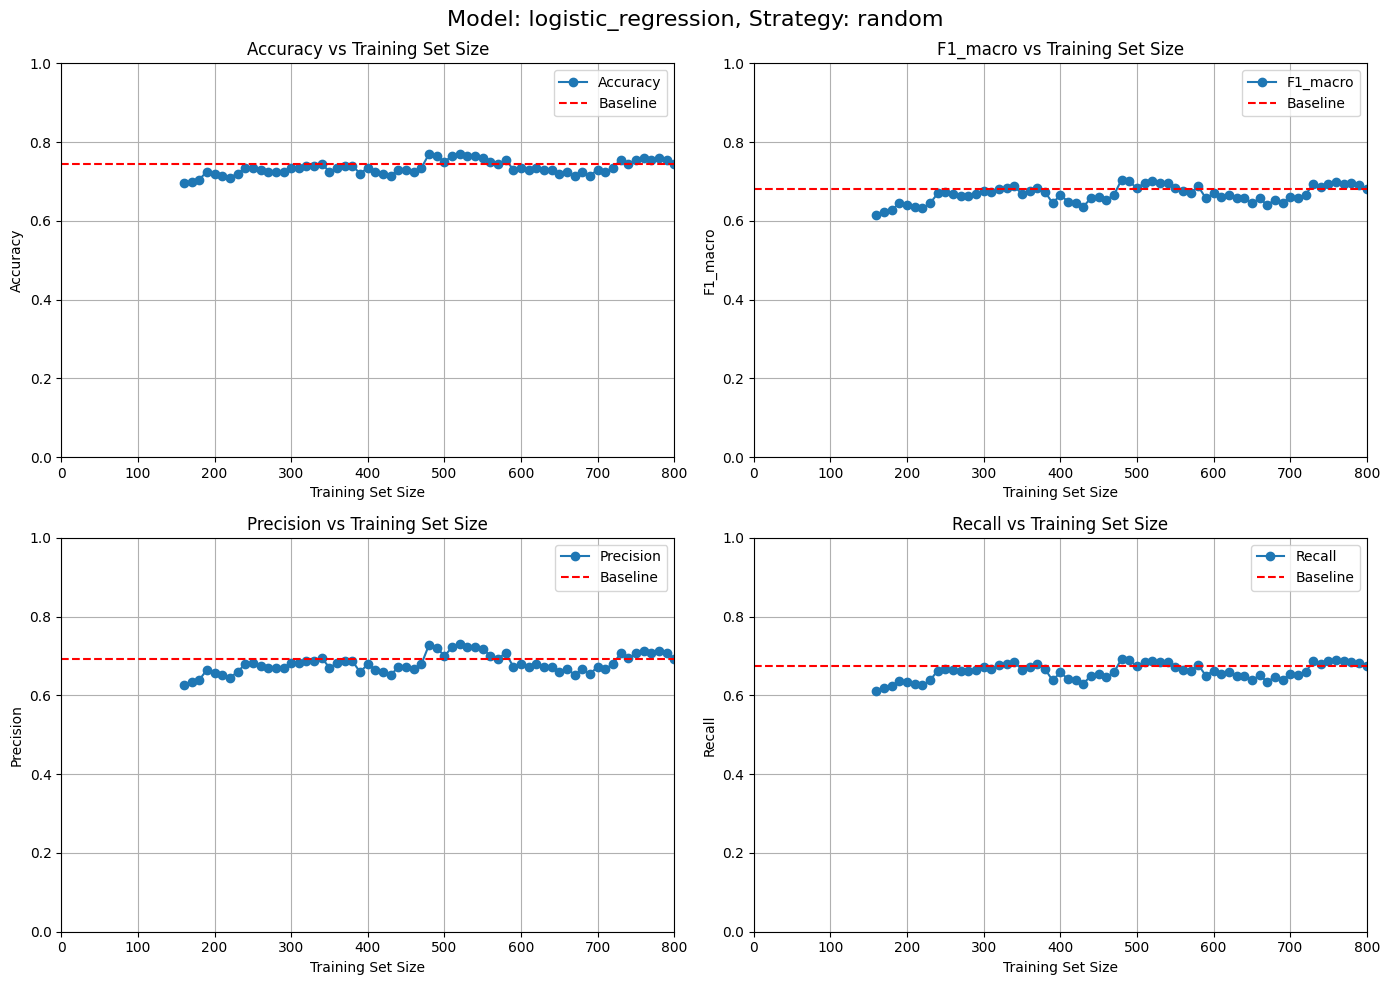

<Figure size 1000x600 with 0 Axes>

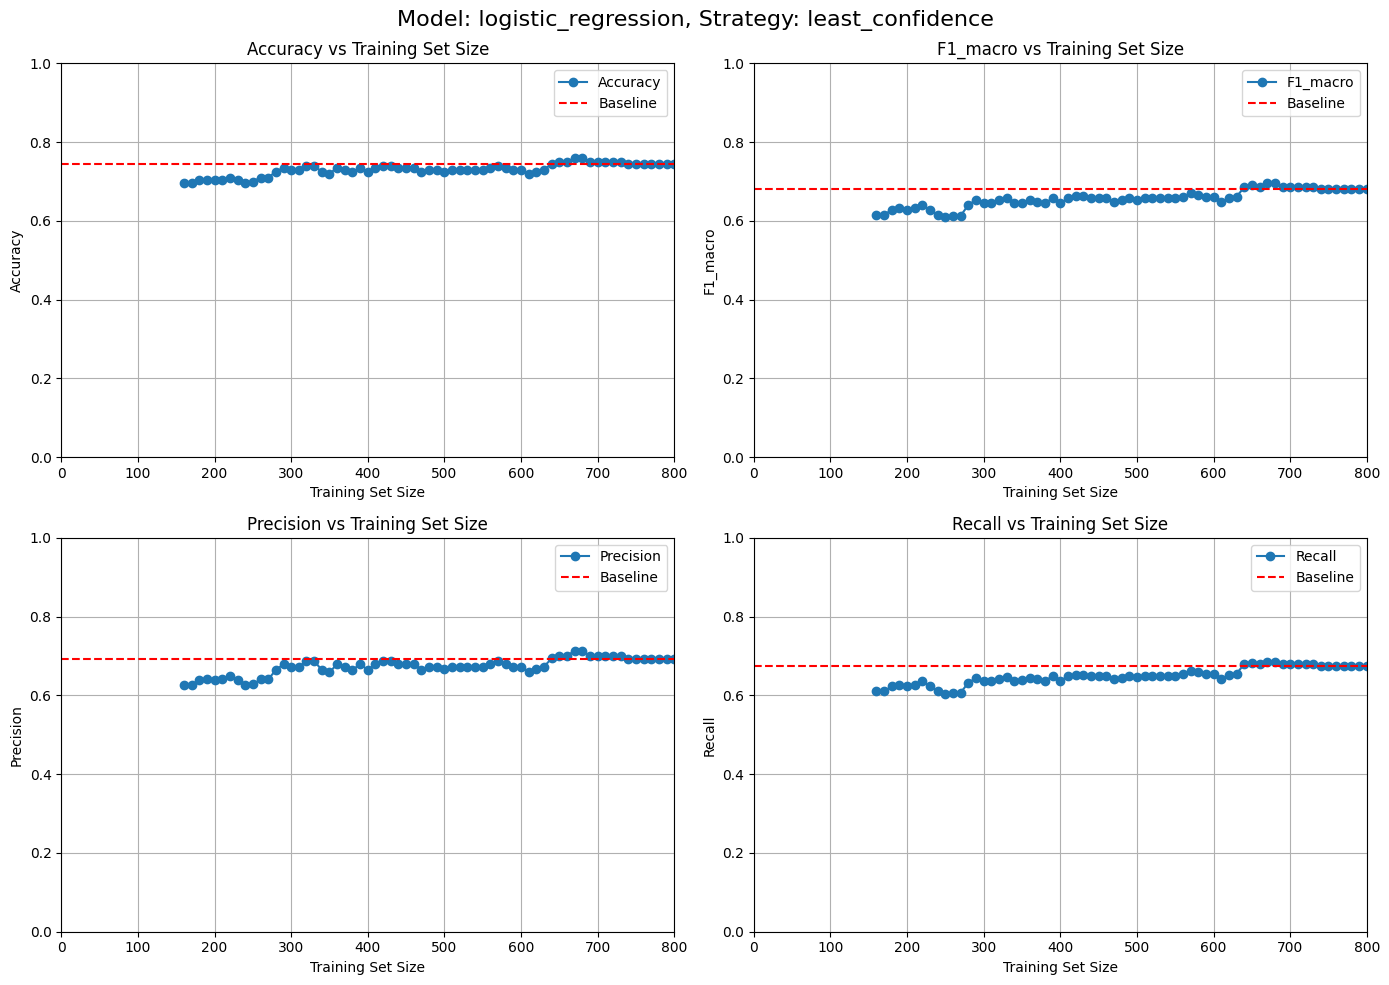

<Figure size 1000x600 with 0 Axes>

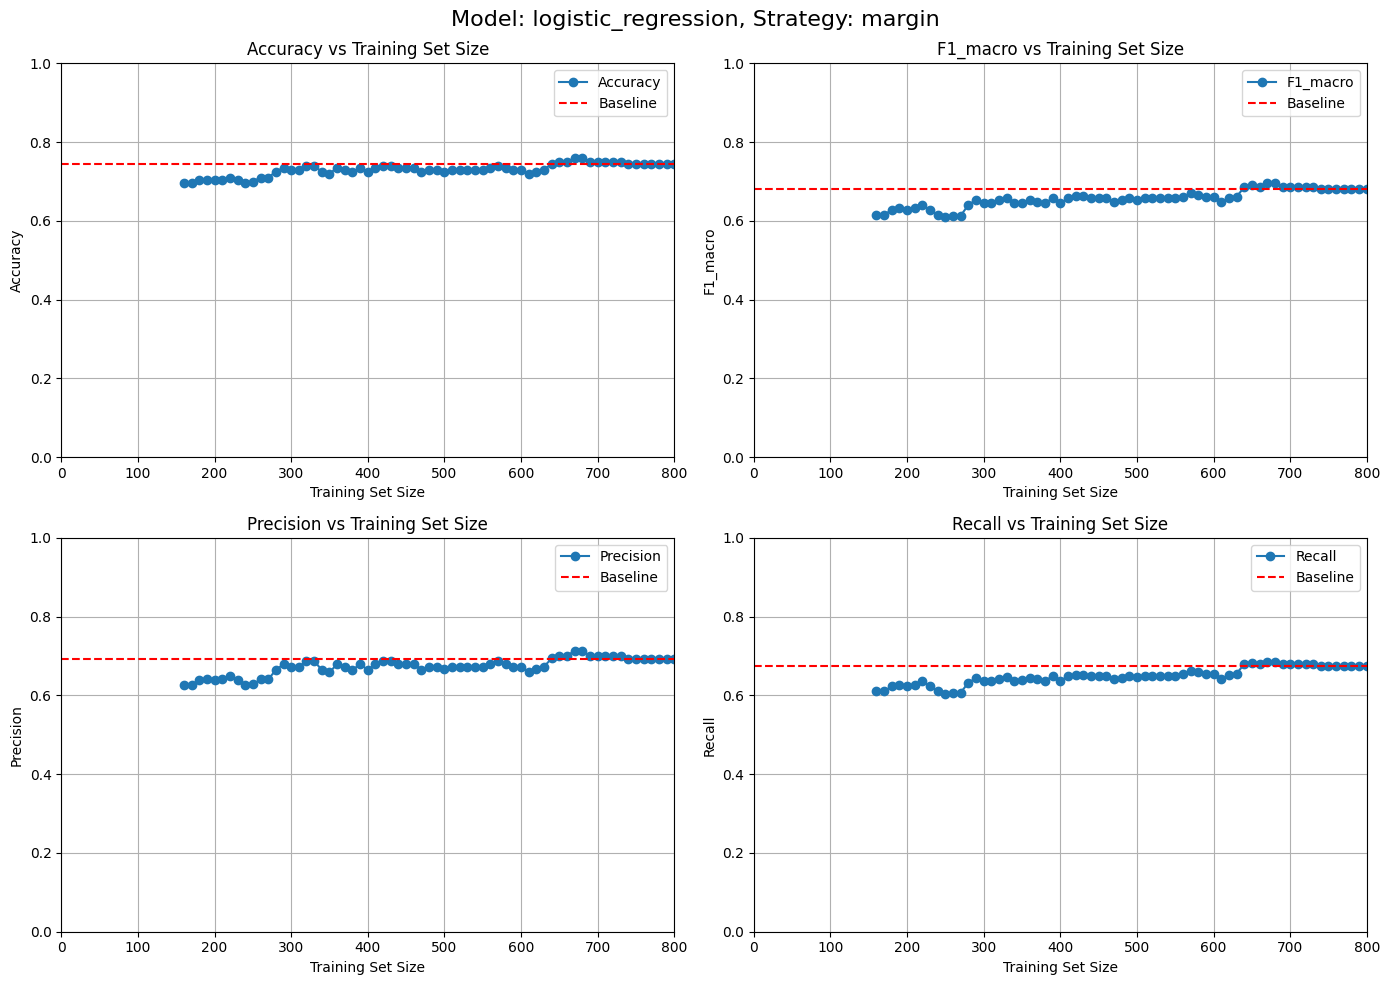

<Figure size 1000x600 with 0 Axes>

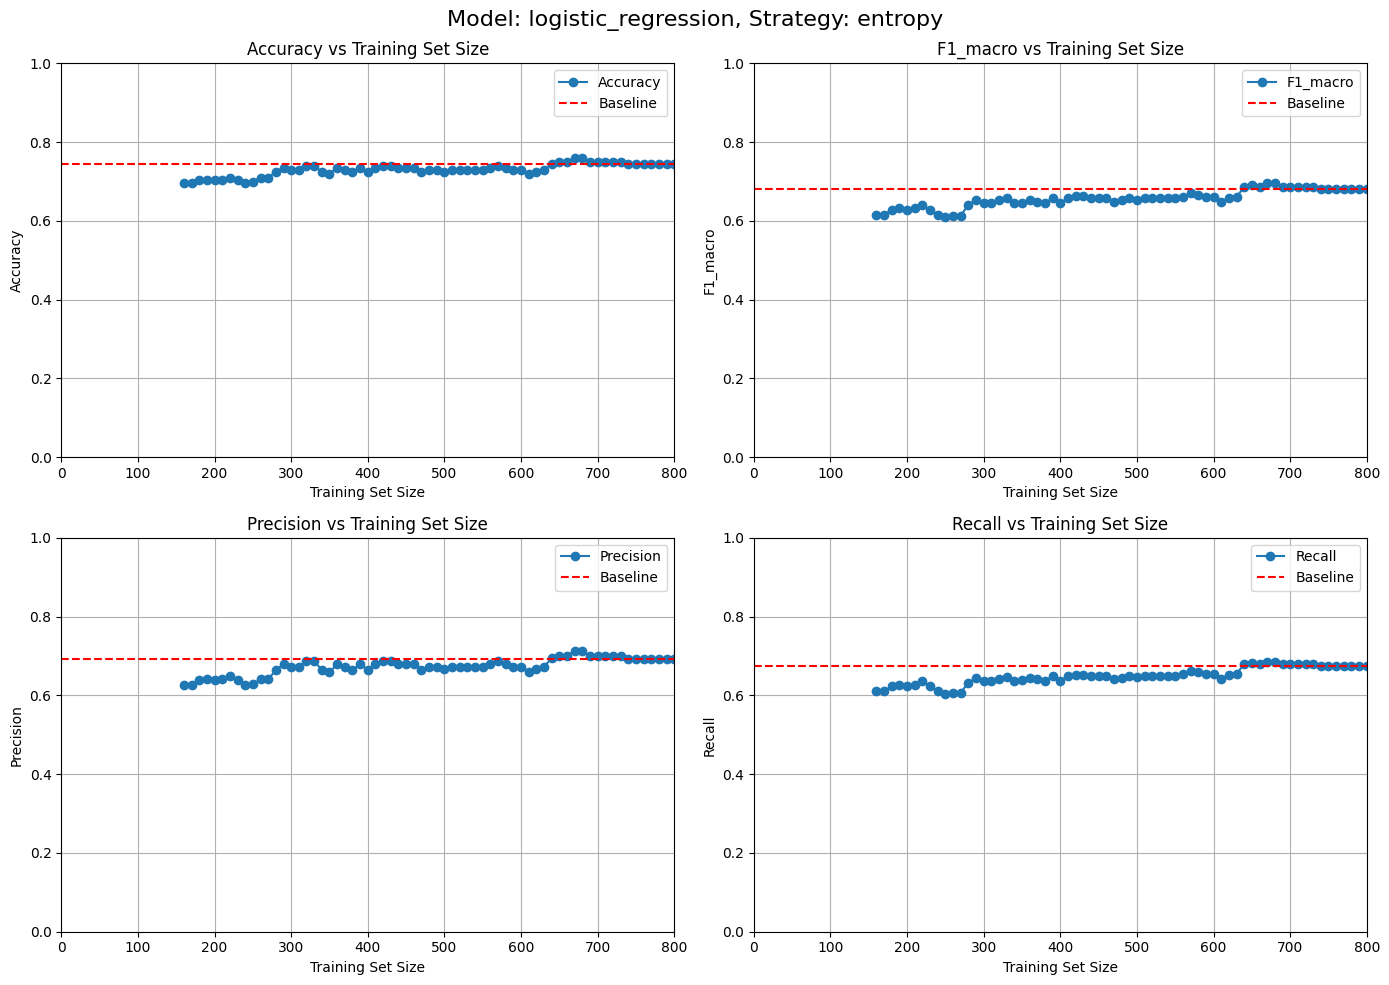

<Figure size 1000x600 with 0 Axes>

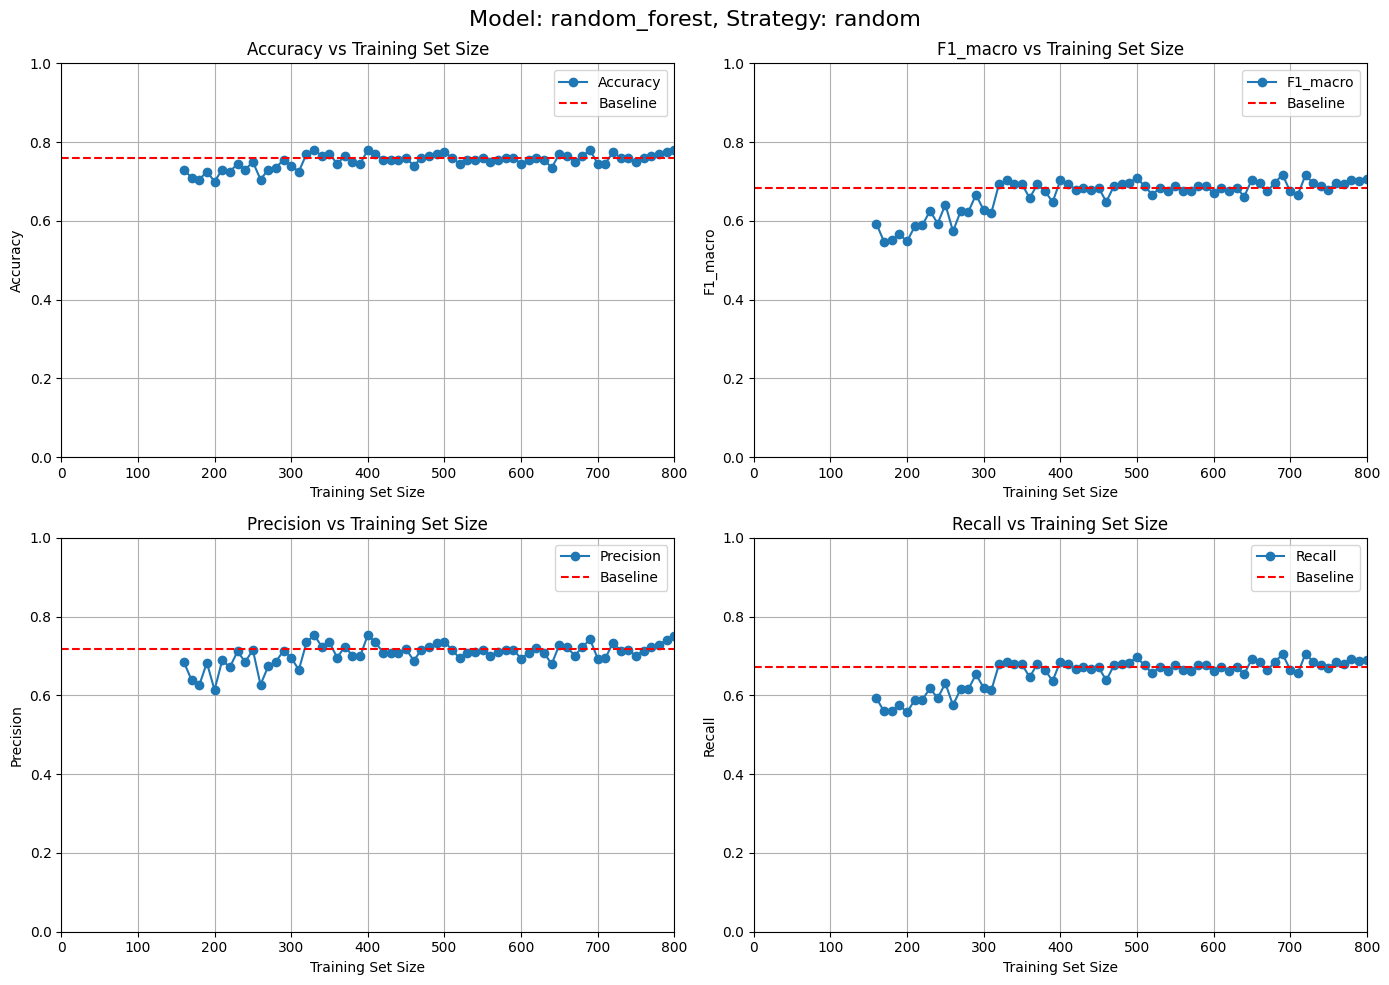

<Figure size 1000x600 with 0 Axes>

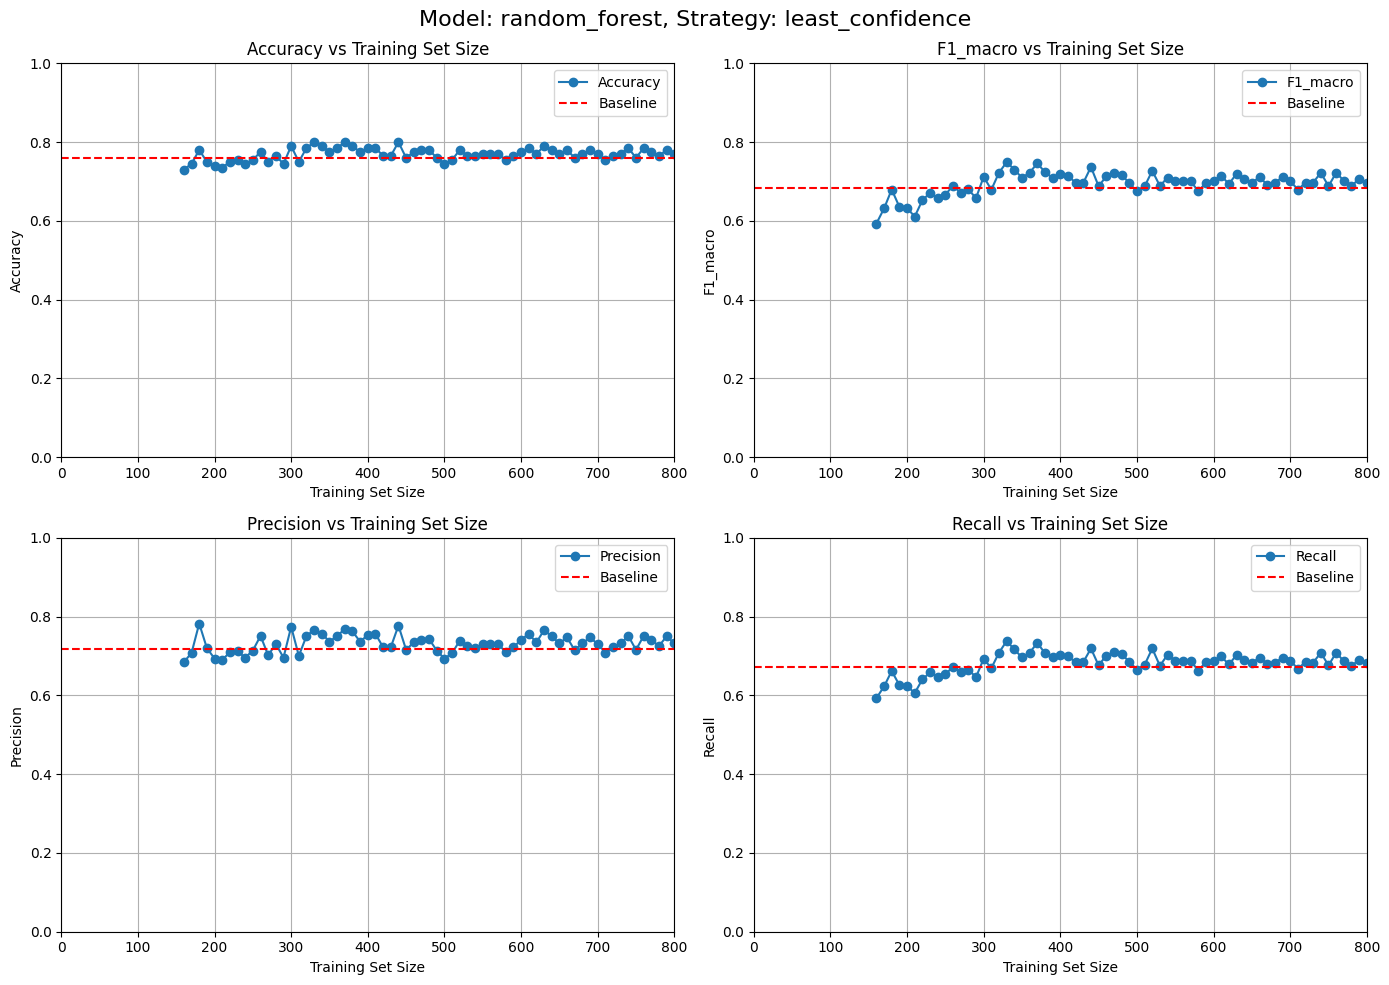

<Figure size 1000x600 with 0 Axes>

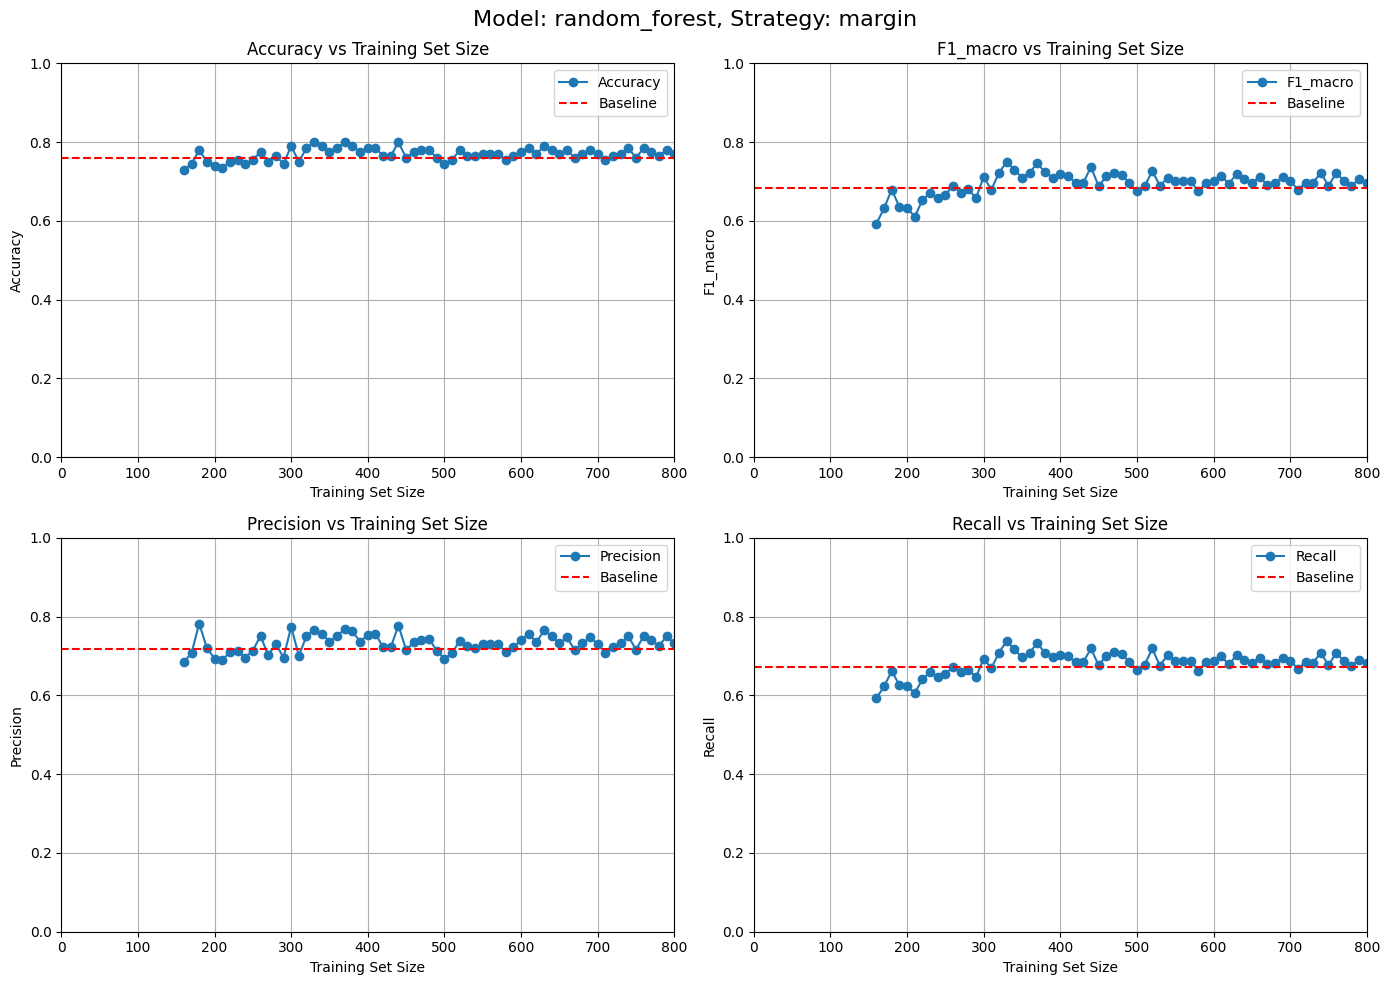

<Figure size 1000x600 with 0 Axes>

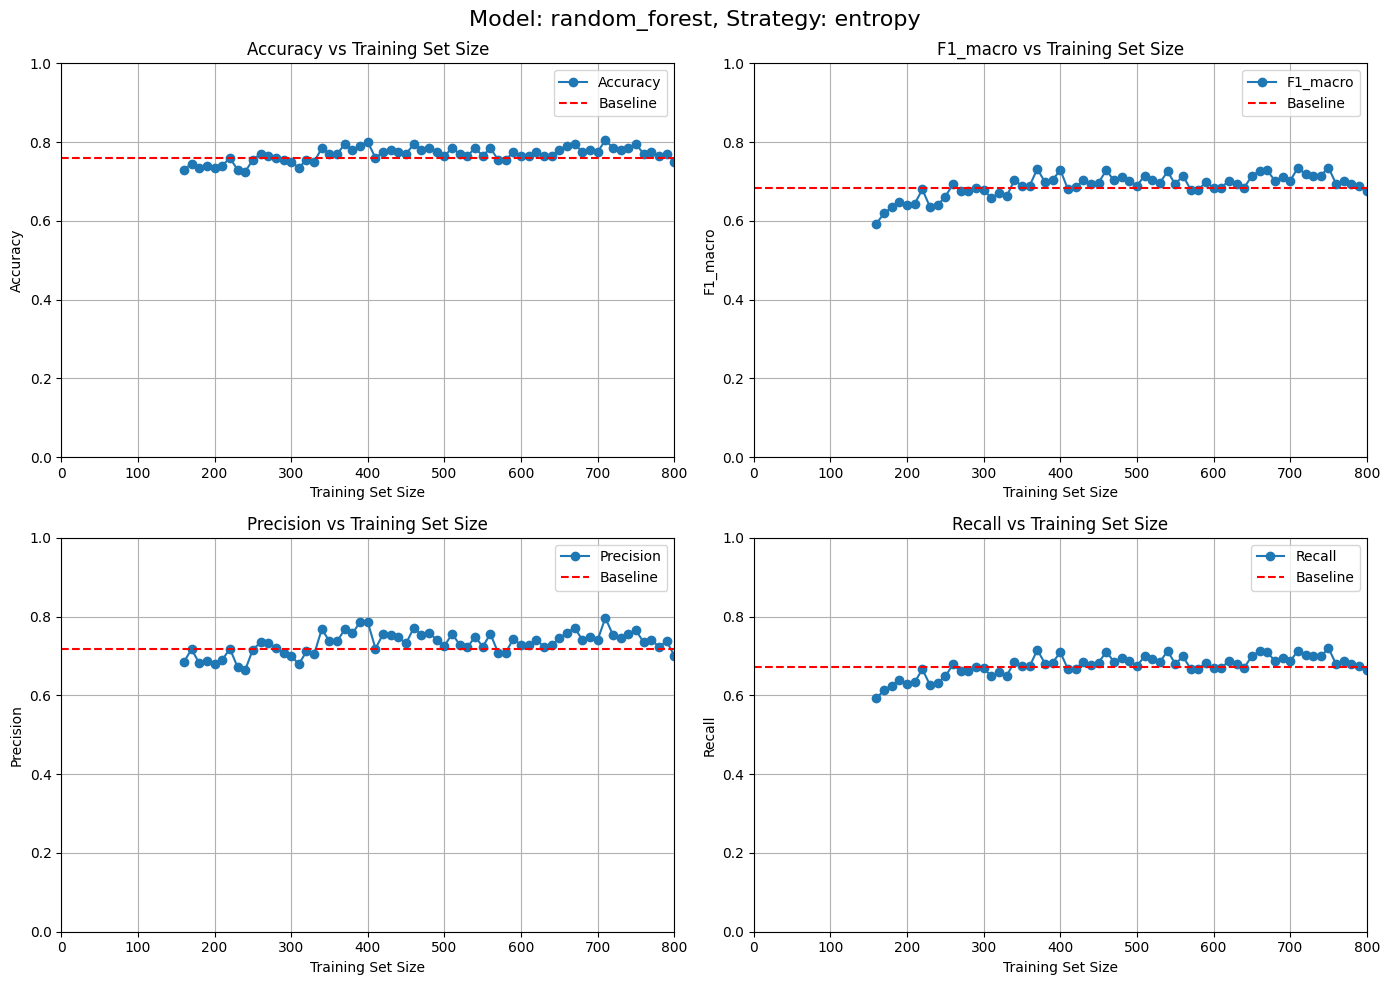

<Figure size 1000x600 with 0 Axes>

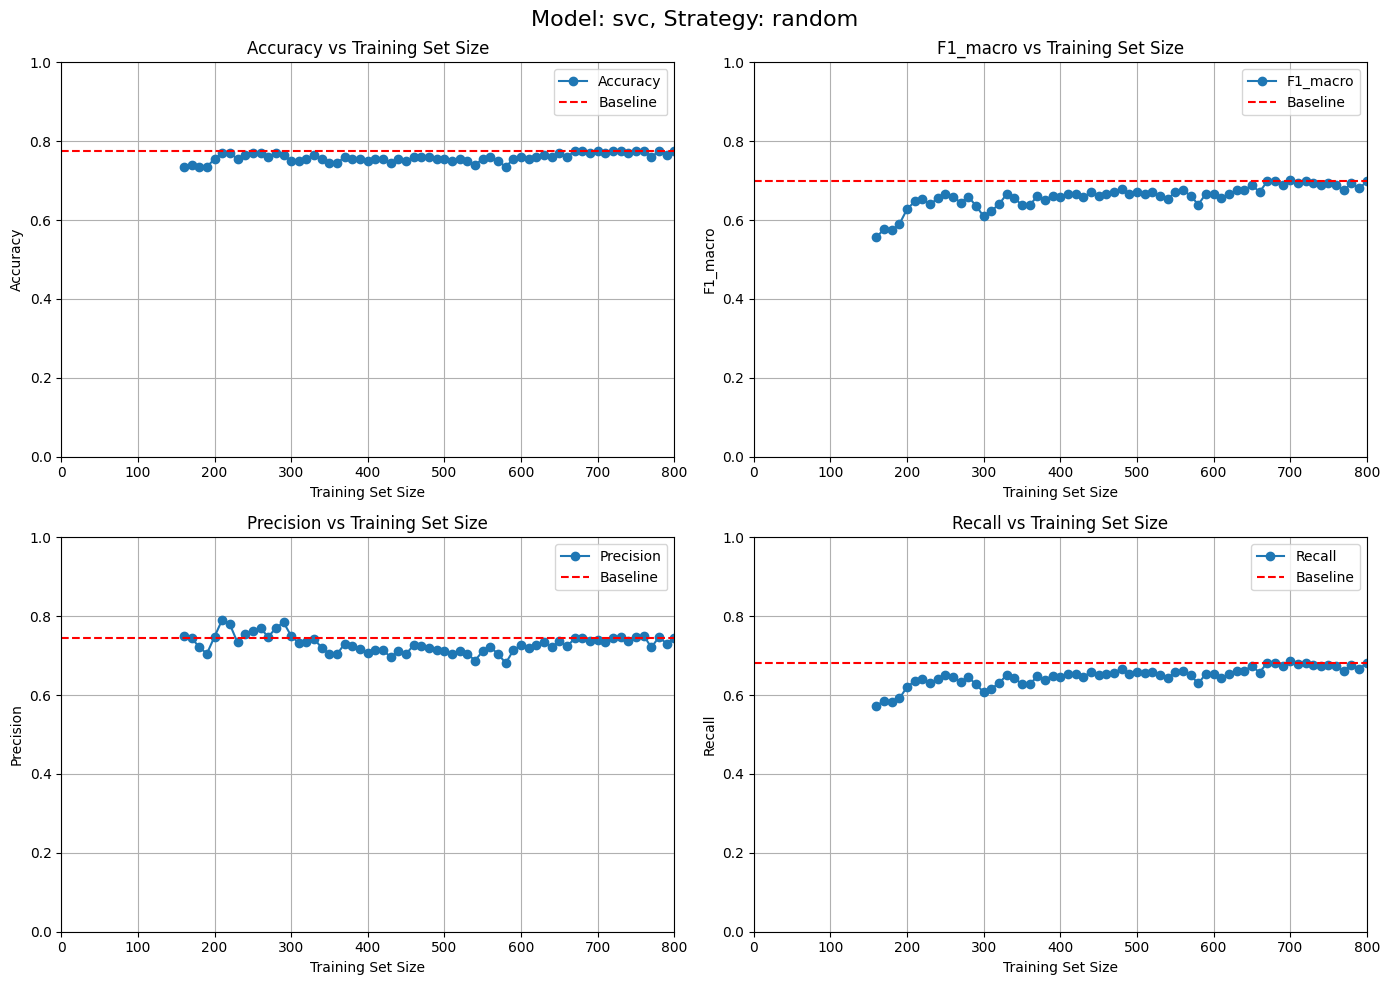

<Figure size 1000x600 with 0 Axes>

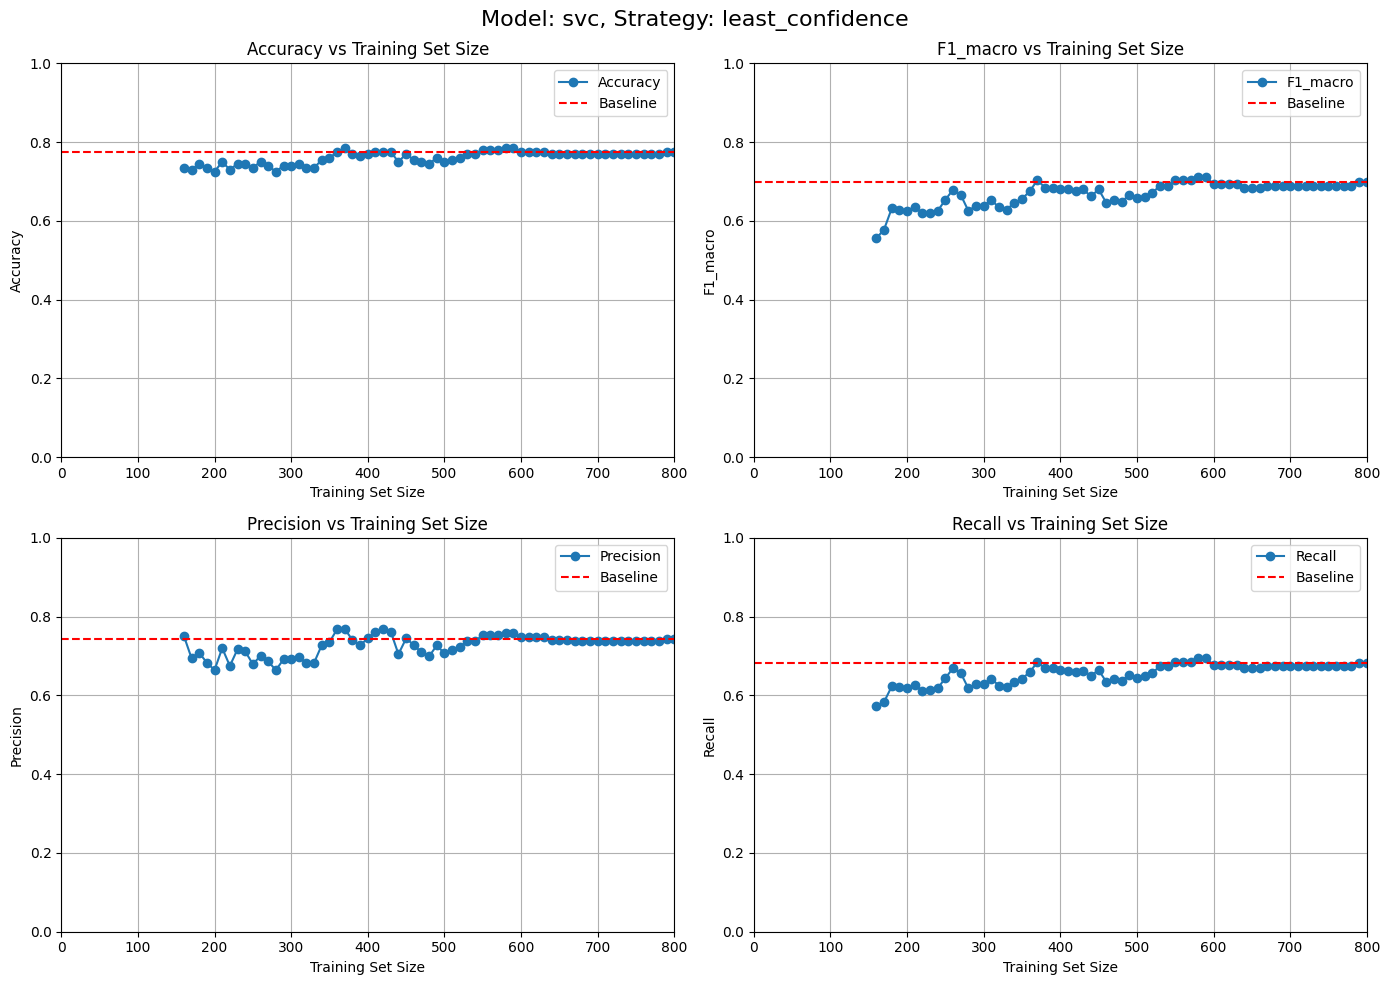

<Figure size 1000x600 with 0 Axes>

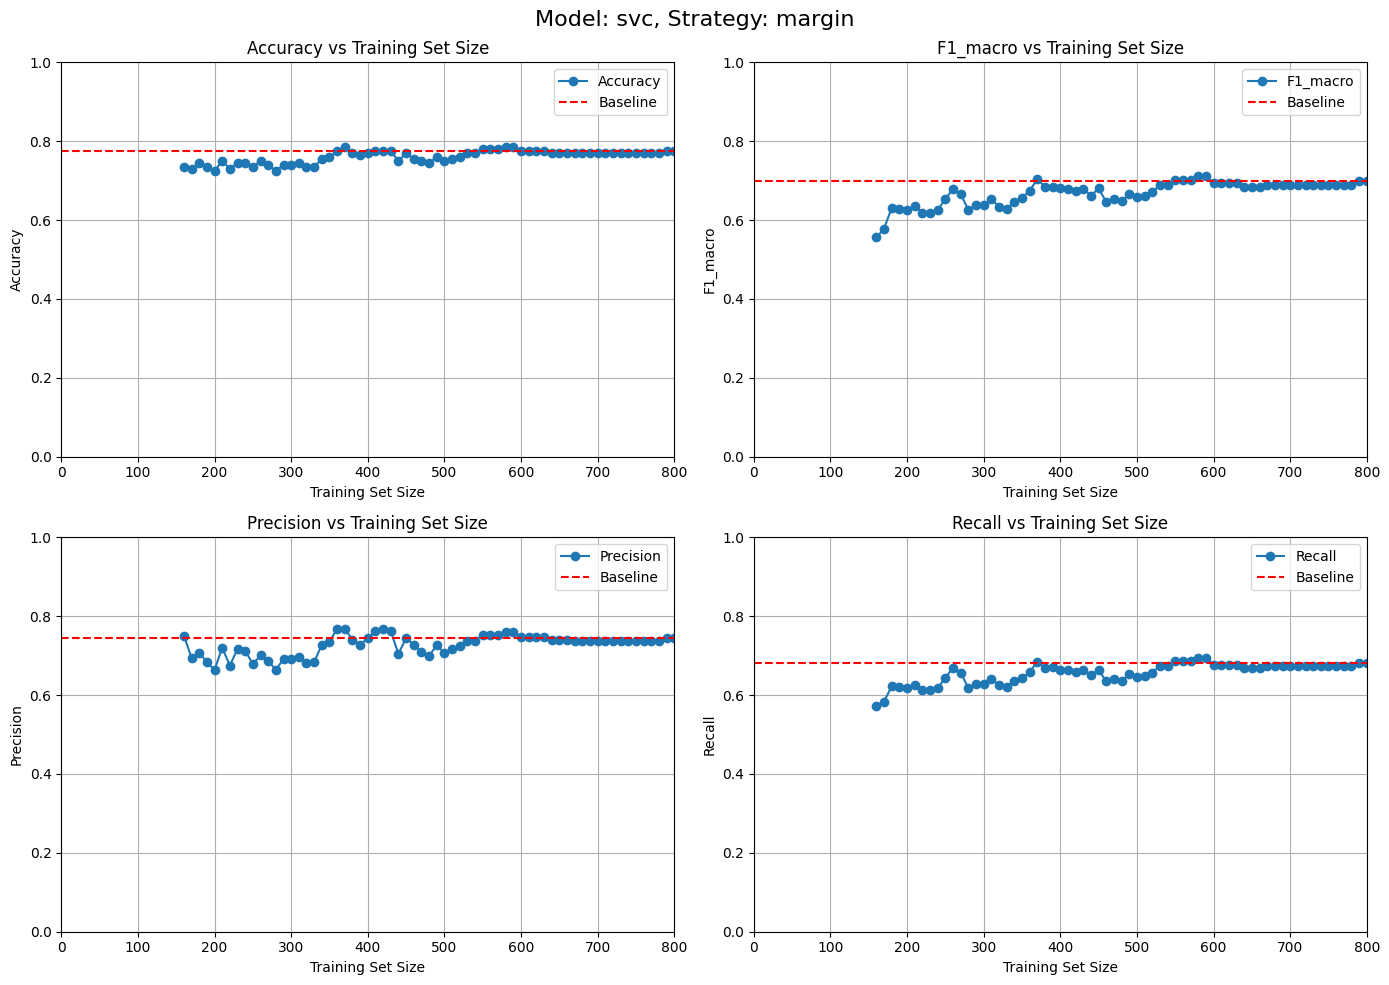

<Figure size 1000x600 with 0 Axes>

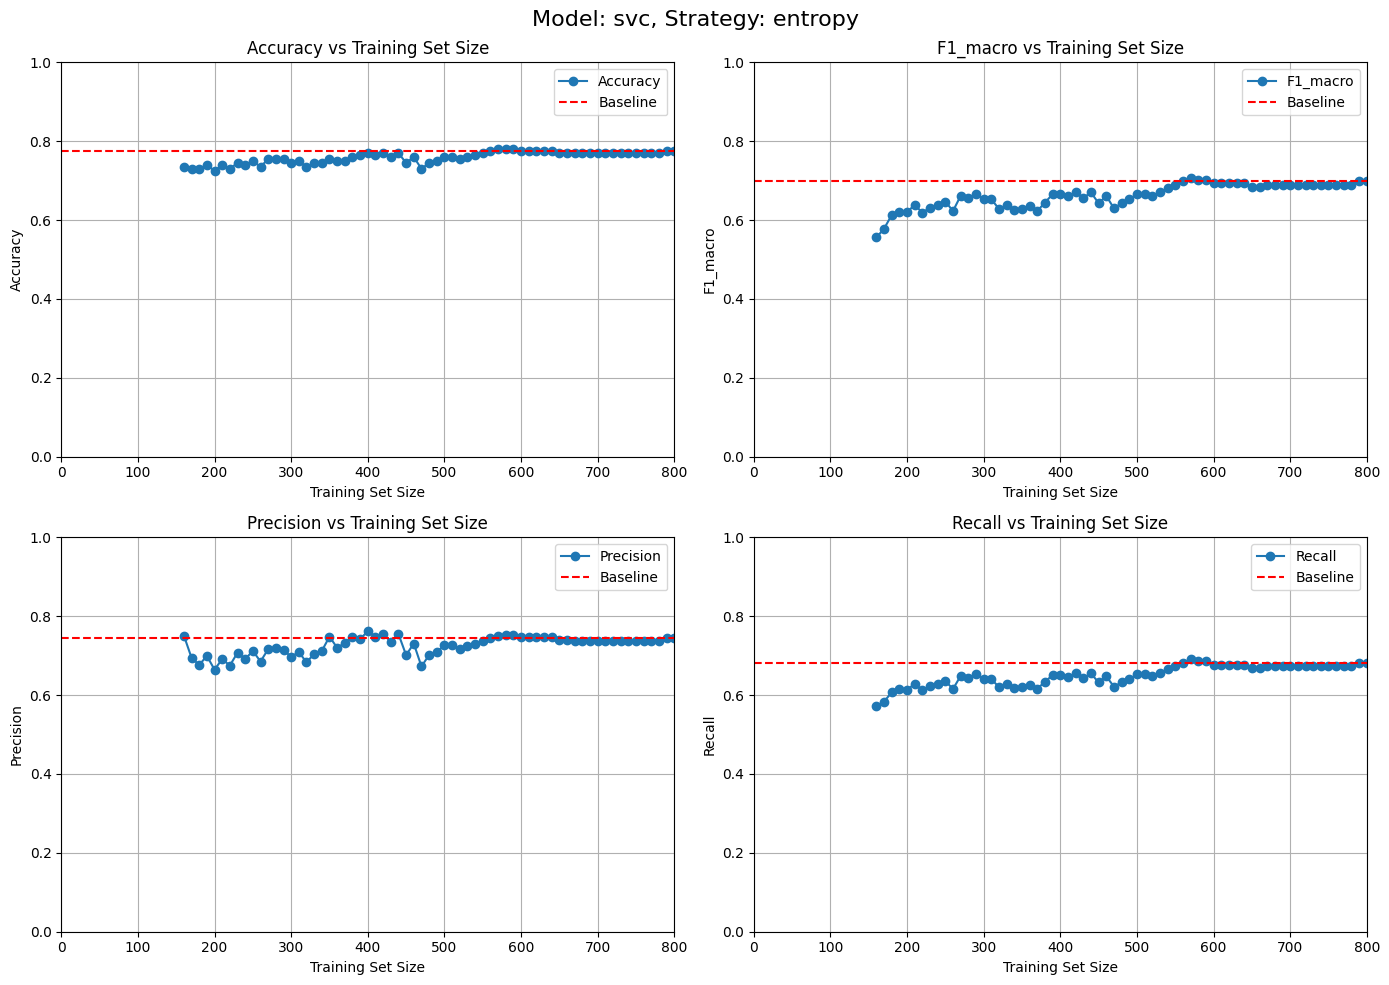

<Figure size 1000x600 with 0 Axes>

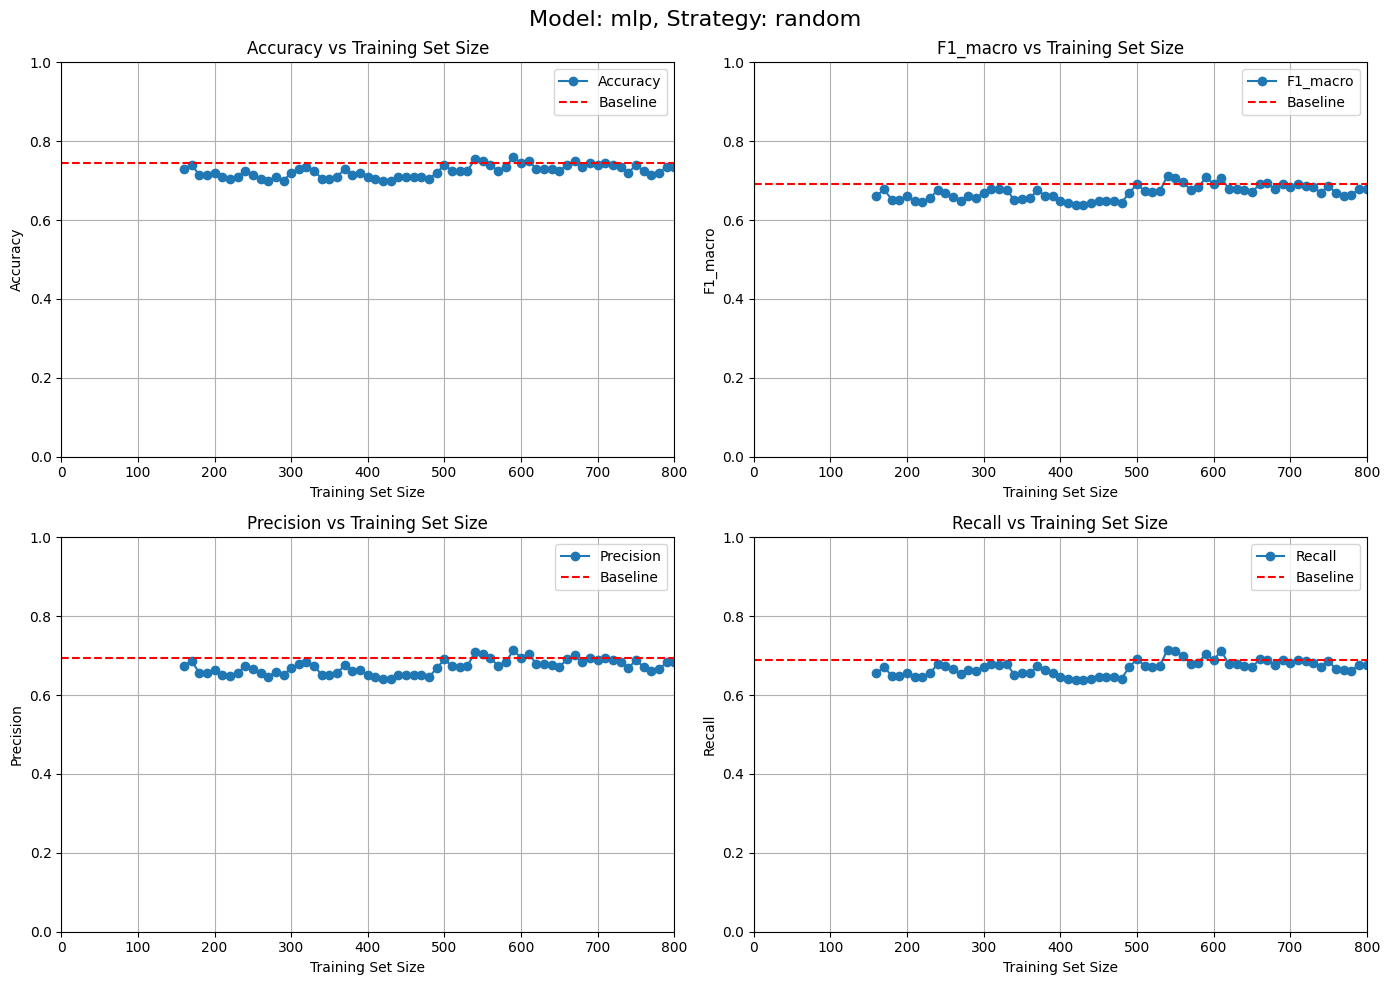

<Figure size 1000x600 with 0 Axes>

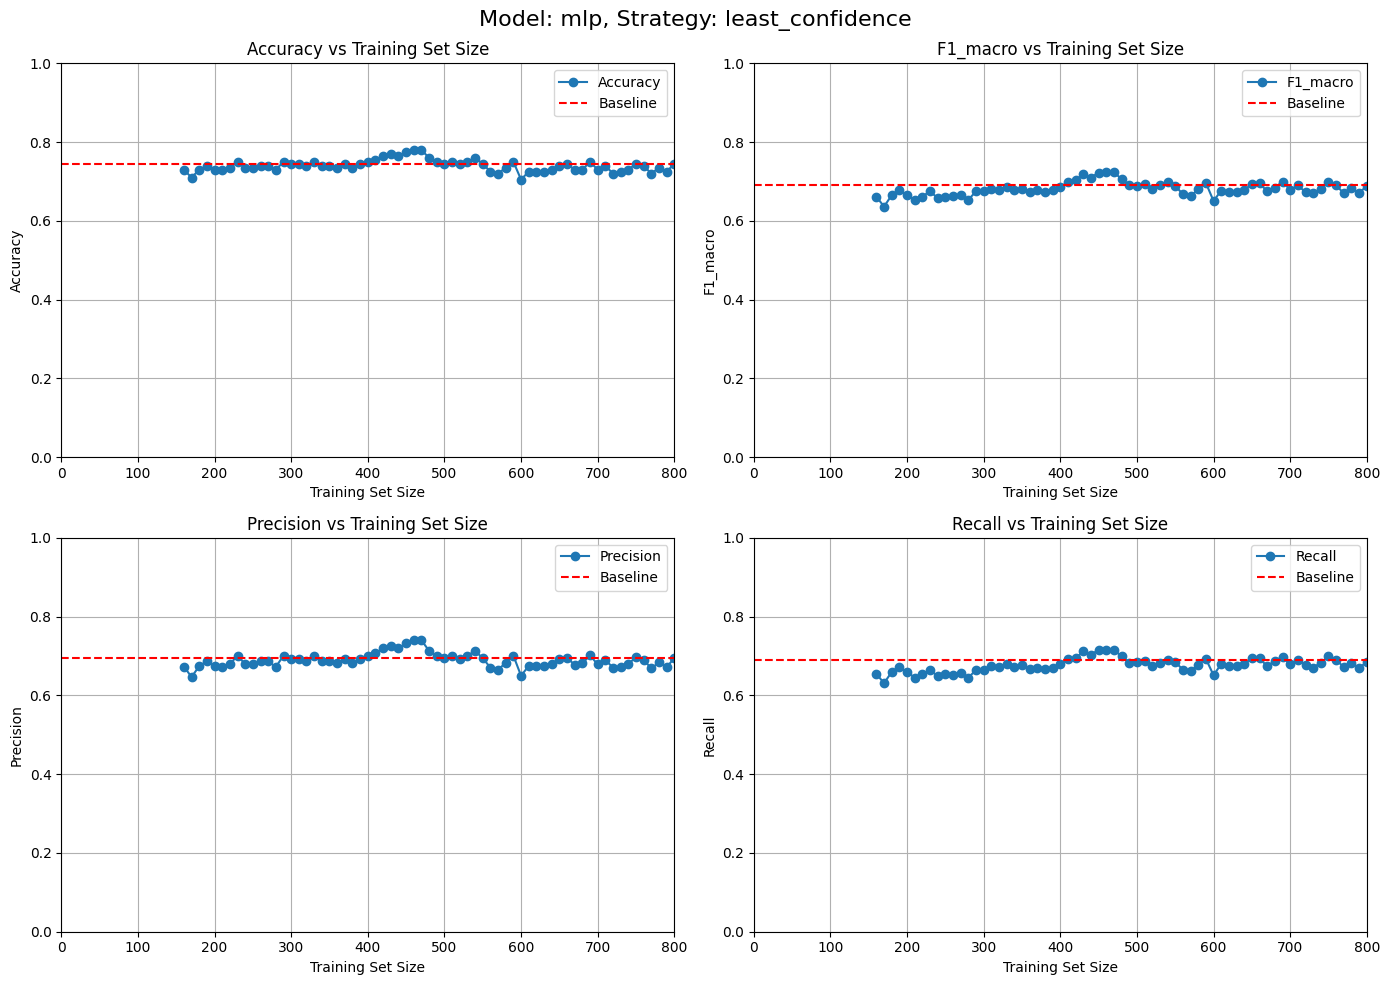

<Figure size 1000x600 with 0 Axes>

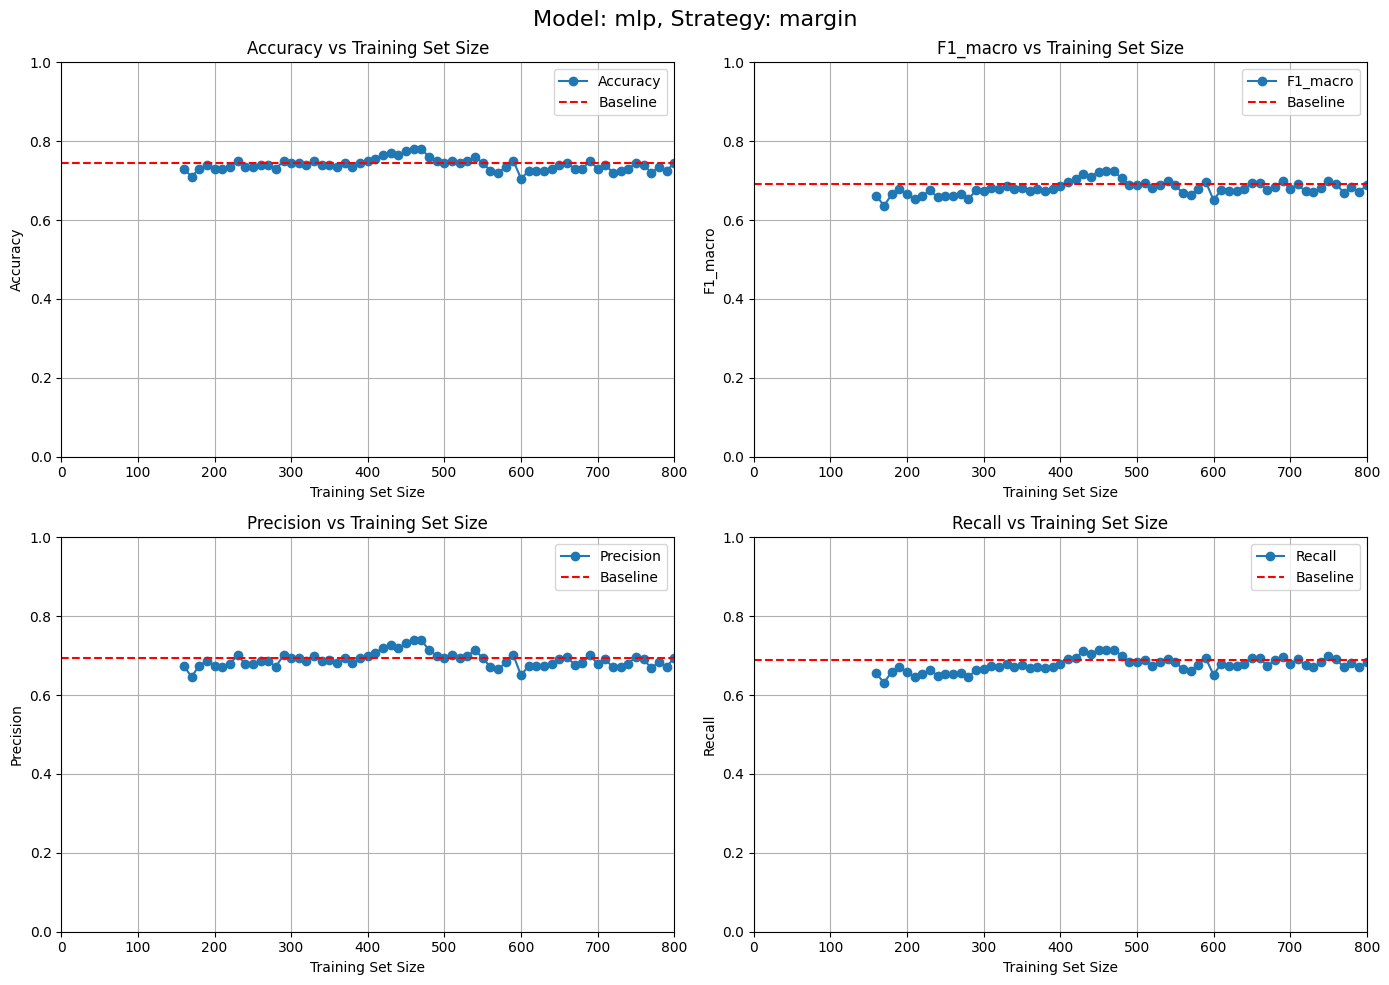

<Figure size 1000x600 with 0 Axes>

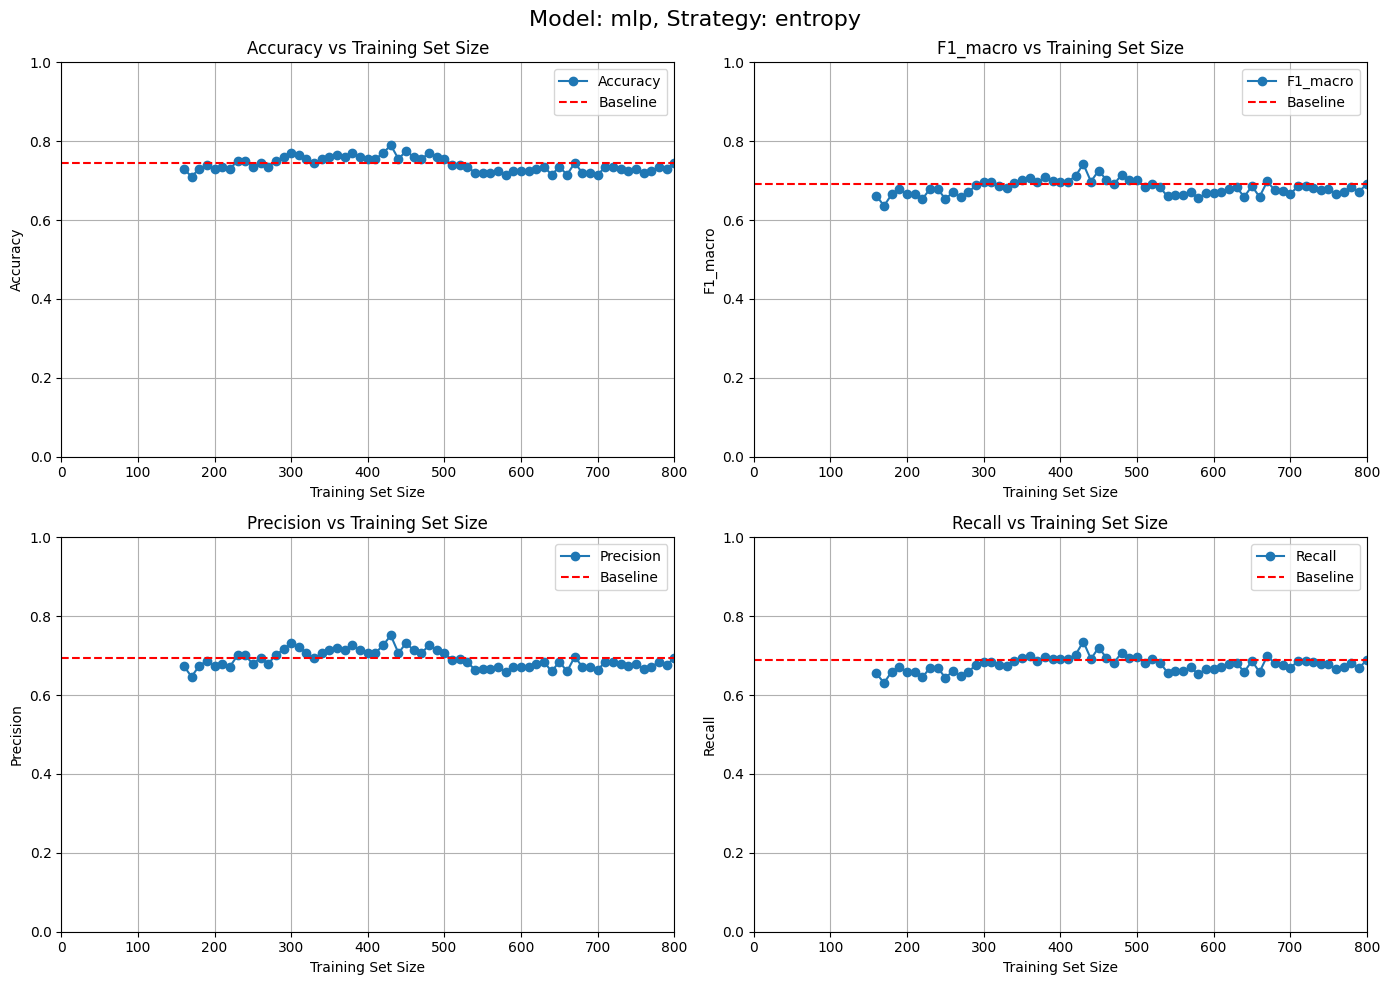

In [6]:
for run in results_all:
    model_name = run["model"]
    strategy_name = run["strategy"]
    metrics = run["results"]
    baseline_metrics = run["baseline"]
        
    plot_metrics(model_name, strategy_name, metrics, baseline_metrics)
